<a href="https://colab.research.google.com/github/cmirb/WIA/blob/main/actors_settlement_geography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [1]:

# file = drive.CreateFile({'id': 'enter key here'})
# file.GetContentFile('geography_settlement_actor_2.csv')

NameError: ignored

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   geography        217 non-null    object 
 1   settlement.type  217 non-null    object 
 2   actor.type       217 non-null    object 
 3   count            217 non-null    int64  
 4   total            217 non-null    int64  
 5   percentage       217 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.9+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

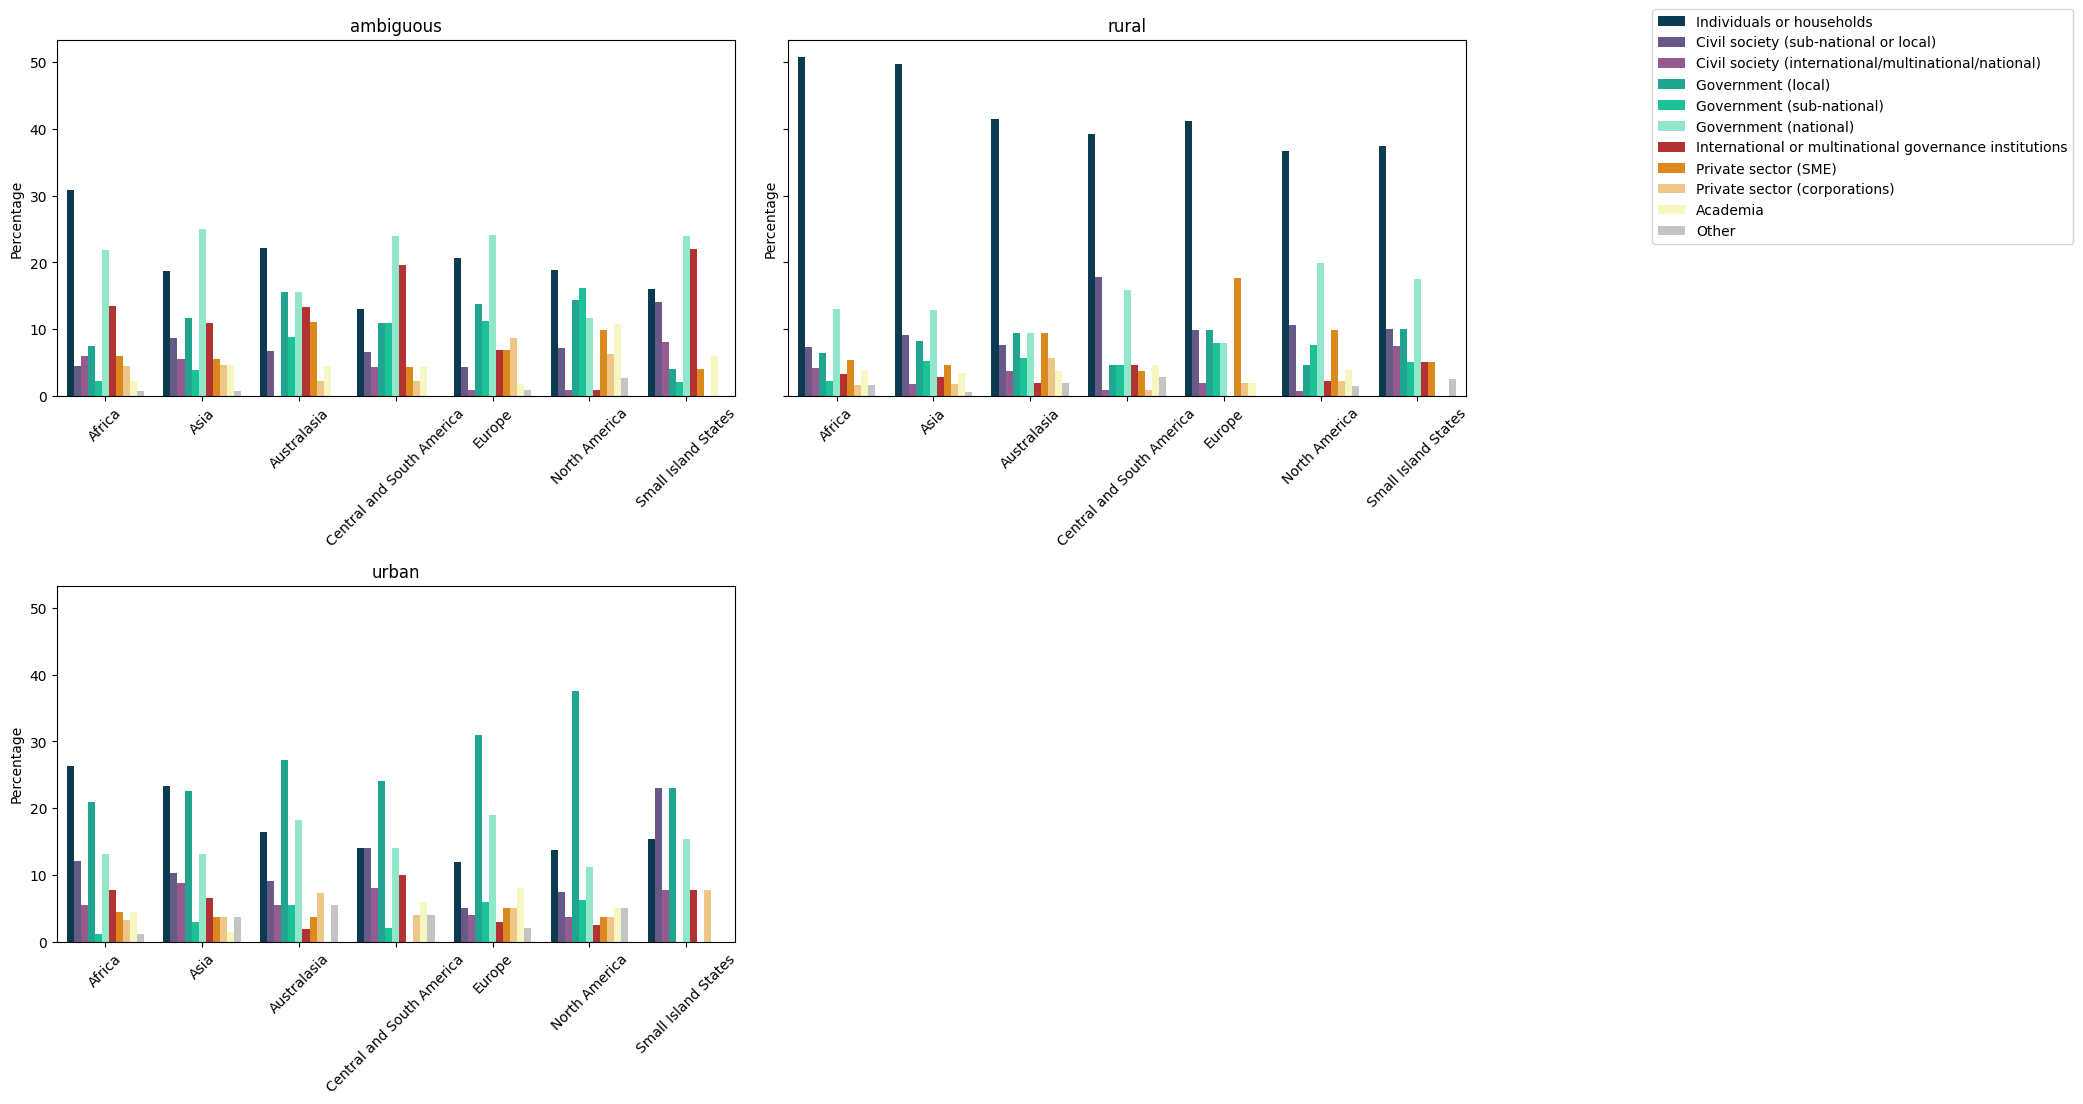

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

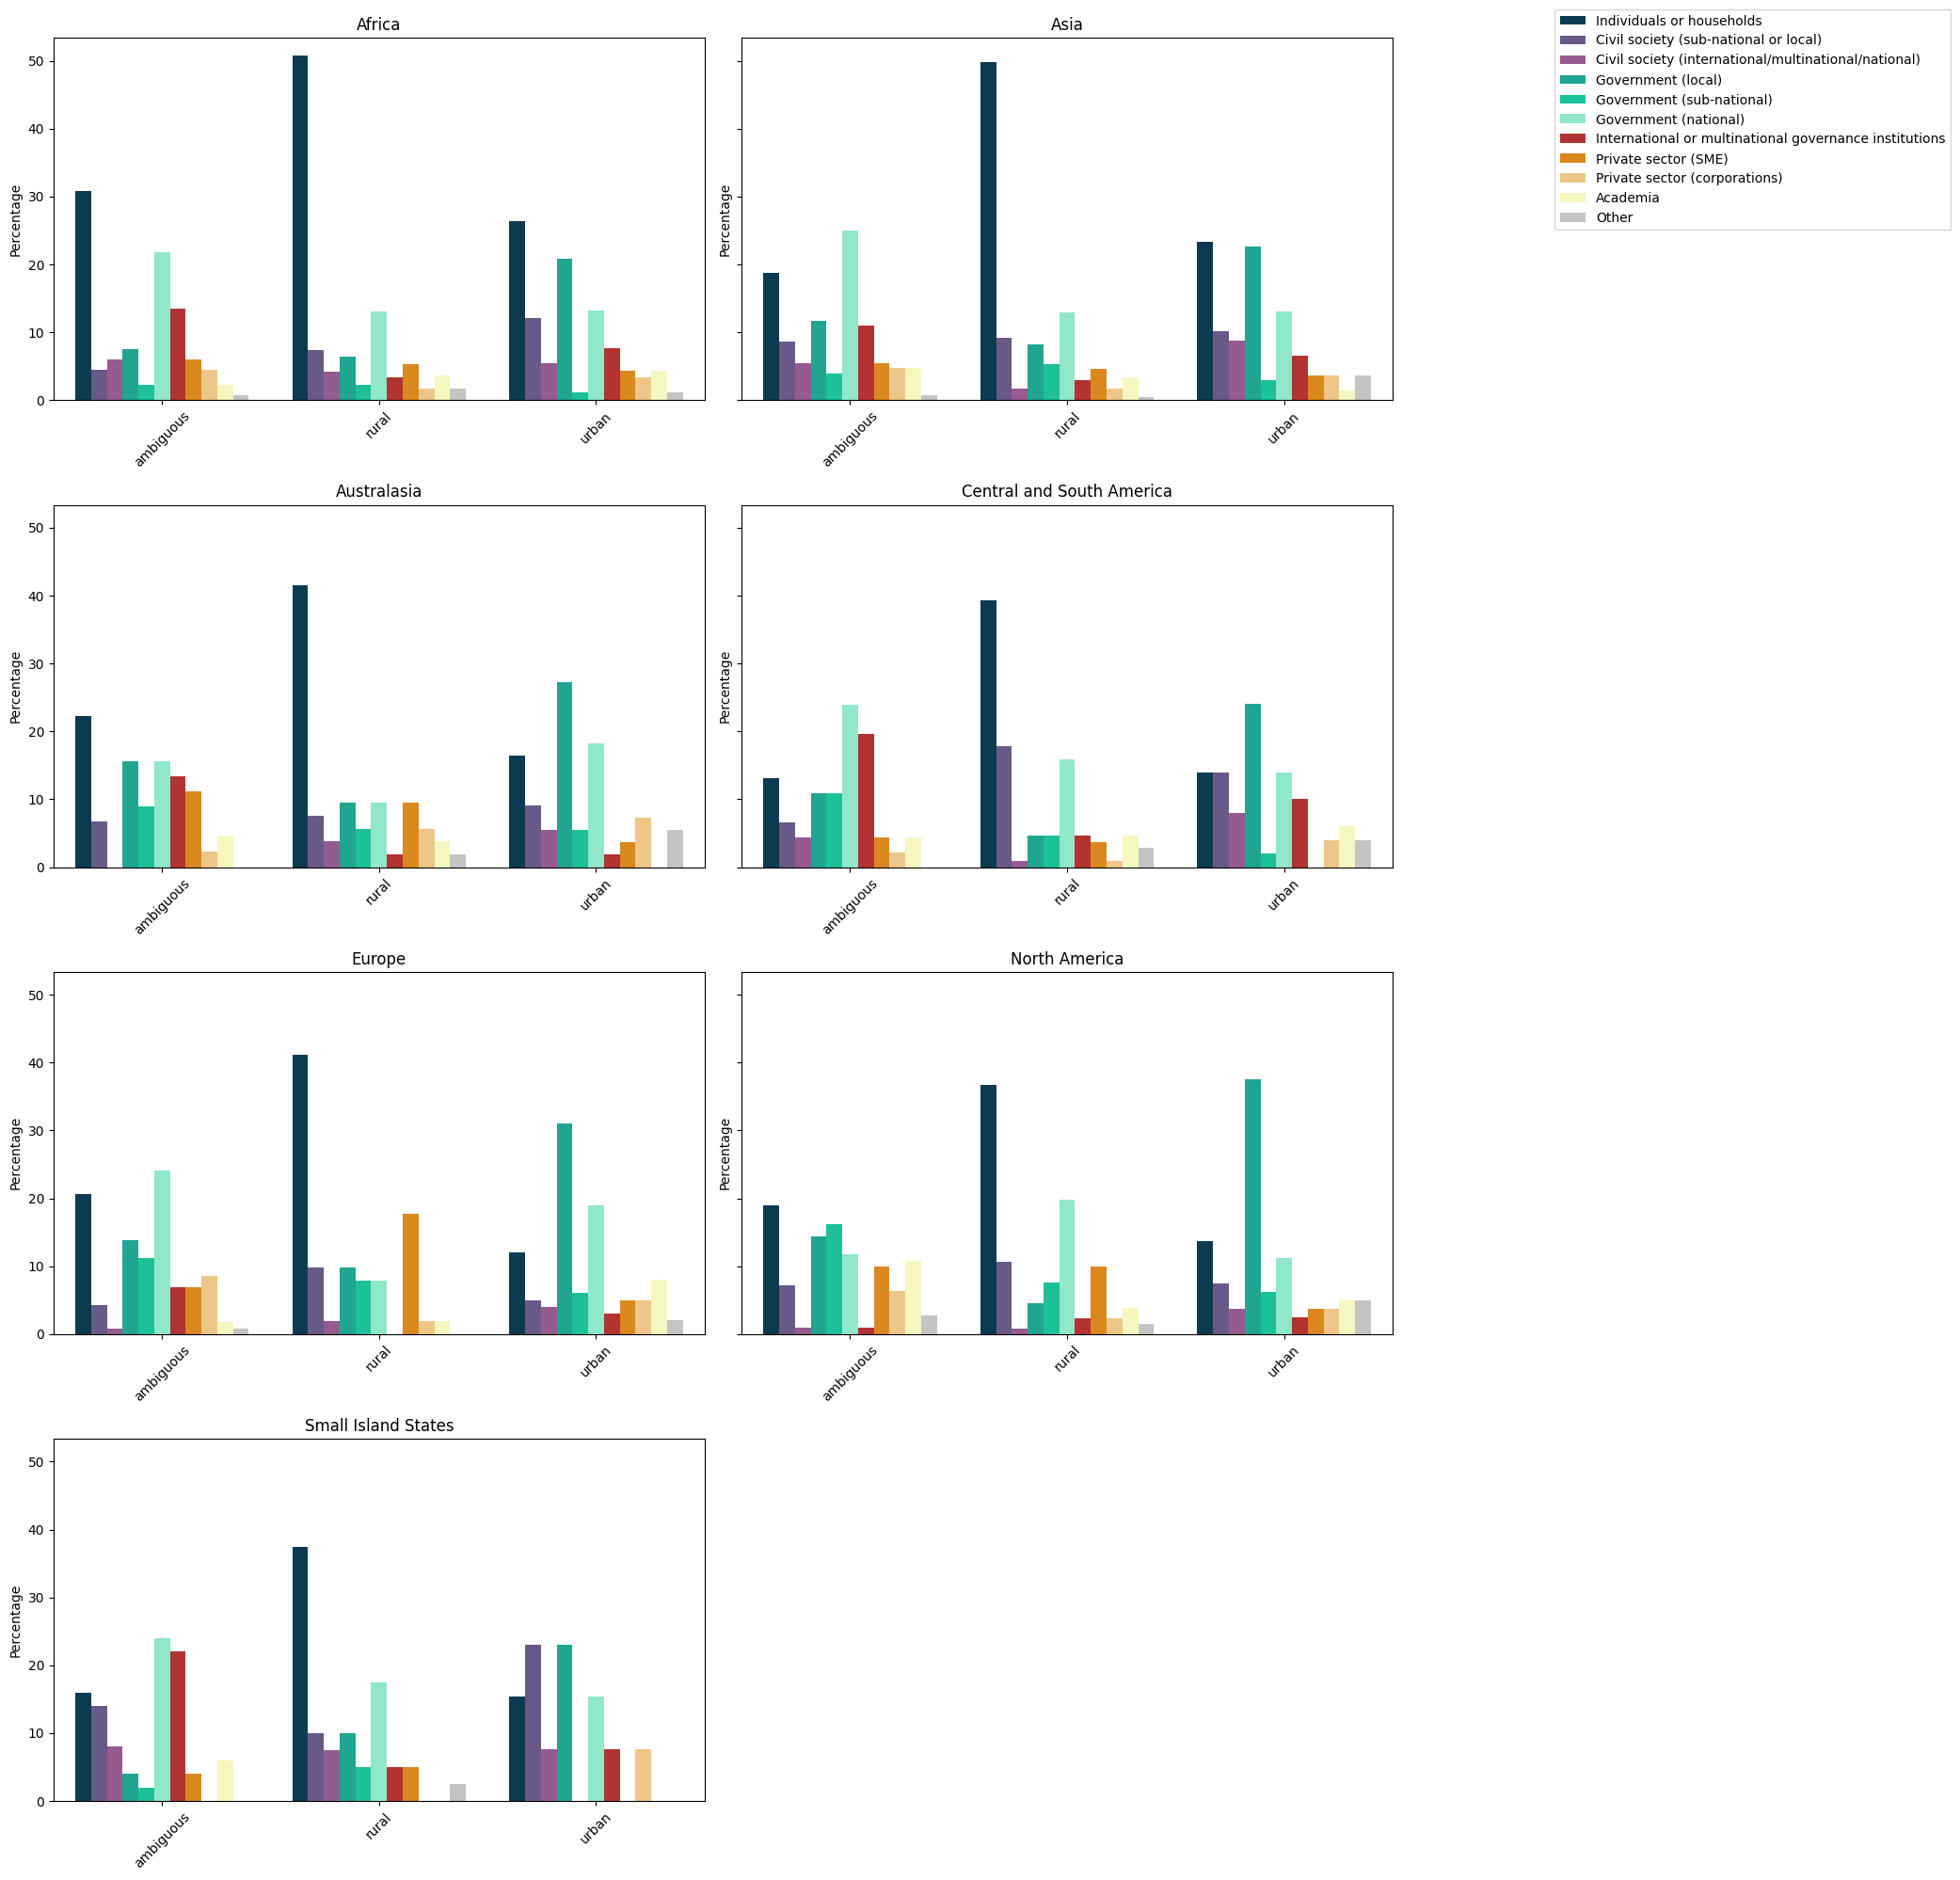

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exception: ignored

In [ ]:
 import pandas as pd
 #import pyforest

# import data
file.GetContentFile('geography_settlement_actor_2.csv')
df = pd.read_csv('geography_settlement_actor_2.csv', on_bad_lines='skip', delimiter = ';')

df.head()

# split 'geography' column after comma
df['geography'] = df['geography'].str.split(',')
df = df.explode('geography')
df['geography'] = df['geography'].str.strip()

# count actors mentioned per geography/settlement type category
count_df = df.groupby(['geography', 'settlement.type'])['actor.type'].value_counts().rename('count').reset_index()
total_df = df.groupby(['geography', 'settlement.type']).size().rename('total').reset_index()

# calculate percentages
percentage_df = pd.merge(count_df, total_df, on=['geography', 'settlement.type'])
percentage_df['percentage'] = percentage_df['count'] / percentage_df['total'] * 100

pd.set_option('display.max_rows', None)
percentage_df
percentage_df.head()
percentage_df.describe()
percentage_df.info()

from google.colab import files

percentage_df.to_csv('percentage_df.csv', index=False)
files.download('percentage_df.csv')

import matplotlib.pyplot as plt
import seaborn as sns

settlement_types = percentage_df['settlement.type'].unique()
settlement_types
geography_types = percentage_df['geography'].unique()
geography_types

# Define the number of rows and columns in the figure
n_rows = 3
n_cols = 2

# Create a figure and axes with subplots()
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15), sharey=True)

# Get the unique settlement types (urban, rural, ambiguous)
settlement_types = percentage_df['settlement.type'].unique()

# Define the order and color palette for the actor types
actor_order = ['Individuals or households', 'Civil society (sub-national or local)', 'Civil society (international/multinational/national)', 'Government (local)', 'Government (sub-national)', 'Government (national)', 'International or multinational governance institutions', 'Private sector (SME)', 'Private sector (corporations)', 'Academia', 'Other']
color_palette = ['#003f5c', '#665191', '#a05195', '#09bb9f', '#00dca6', '#82f5cf', '#c71e1d', '#fa8c00', '#ffca76', '#ffffb7', '#c4c4c4']

# Plot a barplot for each settlement type
for i, settlement_type in enumerate(settlement_types):
    ax = axes[i//n_cols, i%n_cols]
    df_subset = percentage_df[percentage_df['settlement.type'] == settlement_type]
    sns.barplot(x='geography', y='percentage', hue='actor.type', data=df_subset, ax=ax, hue_order=actor_order, palette=color_palette)
    ax.set_title(settlement_type)
    ax.set_ylabel('Percentage')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    ax.get_legend().remove() # Make sure to remove the individual subplot legend

# Remove empty subplots
if len(settlement_types) < n_rows*n_cols:
    for i in range(len(settlement_types), n_rows*n_cols):
        fig.delaxes(axes.flatten()[i])

# Create a single legend for the whole figure, placed outside of the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1))

# Automatically adjust subplot params so that the subplotS fits into the figure area
plt.tight_layout()

# Show the plot
plt.show()

# export plot
fig.savefig('settlement_plots.png', bbox_inches='tight', dpi=300)
files.download('settlement_plots.png')

## one plot per geography type ##
# Define the number of rows and columns
n_rows = 4
n_cols = 2

# Create a figure and axes with subplots()
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20), sharey=True)

# Get the unique geography types
geography_types = percentage_df['geography'].unique()

# Define the order and color palette for the actor types
actor_order = ['Individuals or households', 'Civil society (sub-national or local)', 'Civil society (international/multinational/national)', 'Government (local)', 'Government (sub-national)', 'Government (national)', 'International or multinational governance institutions', 'Private sector (SME)', 'Private sector (corporations)', 'Academia', 'Other']
color_palette = ['#003f5c', '#665191', '#a05195', '#09bb9f', '#00dca6', '#82f5cf', '#c71e1d', '#fa8c00', '#ffca76', '#ffffb7', '#c4c4c4']

# Plot a barplot for each geography type
for i, geography_type in enumerate(geography_types):
    ax = axes[i//n_cols, i%n_cols]
    df_subset = percentage_df[percentage_df['geography'] == geography_type]
    sns.barplot(x='settlement.type', y='percentage', hue='actor.type', data=df_subset, ax=ax, hue_order=actor_order, palette=color_palette)
    ax.set_title(geography_type)
    ax.set_ylabel('Percentage')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    ax.get_legend().remove() # Make sure to remove the individual subplot legend

# Remove empty subplots
if len(geography_types) < n_rows*n_cols:
    for i in range(len(geography_types), n_rows*n_cols):
        fig.delaxes(axes.flatten()[i])

# Create a single legend for the whole figure, placed outside of the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1))

# Automatically adjust subplot params so that the subplotS fits into the figure area
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('geography_plots.png', bbox_inches='tight', dpi=300)
files.download('geography_plots.png')


import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get the unique settlement types
settlement_types = percentage_df['settlement.type'].unique()

# Define the order and color palette for the actor types
actor_order = ['Individuals or households', 'Civil society (sub-national or local)', 'Civil society (international/multinational/national)', 'Government (local)', 'Government (sub-national)', 'Government (national)', 'International or multinational governance institutions', 'Private sector (SME)', 'Private sector (corporations)', 'Academia', 'Other']
color_palette = ['#003f5c', '#665191', '#a05195', '#09bb9f', '#00dca6', '#82f5cf', '#c71e1d', '#fa8c00', '#ffca76', '#ffffb7', '#c4c4c4']

# Create subplots, using 'domain' type for x/y axes
fig = make_subplots(rows=len(settlement_types), cols=1, subplot_titles=settlement_types,
                    vertical_spacing=0.15)

# Add traces and collect legend items
legend_items = []
for i, settlement_type in enumerate(settlement_types):
    for actor, color in zip(actor_order, color_palette):
        df_subset = percentage_df[(percentage_df['settlement.type'] == settlement_type) & (percentage_df['actor.type'] == actor)]
        showlegend = True if i == 0 else False  # Show legend only for the first subplot
        fig.add_trace(go.Bar(x=df_subset['geography'], y=df_subset['percentage'], 
                             name=actor, marker=dict(color=color), 
                             hovertemplate='Percentage: %{y:.2f}<extra></extra>',
                             showlegend=showlegend),   # Use the conditional check here
                      row=i+1, col=1)
        if showlegend:
            legend_items.append(go.Bar(name=actor, marker=dict(color=color)))

# Update yaxis properties
fig.update_yaxes(title_text='Percentage', col=1)

# Add the legend outside the subplots
fig.add_trace(legend_items[0], row=1, col=2)
for i in range(1, len(legend_items)):
    fig.add_trace(legend_items[i], row=i+1, col=2)

# Update layout
fig.update_layout(height=900, width=1000, title_text="Actor Type Percentages by Settlement Type",
                  showlegend=False, barmode='stack',
                  legend=dict(x=1.1, y=0.5, bgcolor='rgba(255,255,255,0.7)', bordercolor='rgba(0,0,0,0.5)', borderwidth=1))

# Show the plot
fig.show()

import plotly.io as py

py.write_html(fig, 'interactive_settlement_plots.html')
# Download the file to your local system
files.download('interactive_settlement_plots.html')
